In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/R18. insurance.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.shape

(395, 33)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Recheck for missing (null) values

df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
for i in range(0,df['children'].shape[0]):
    if df['children'][i] < 4:
        df['children'][i] = 'low'
    elif df['children'][i] >= 4 and df['children'][i] <14:
        df['children'][i] = 'median'
    elif df['children'][i] >= 1:
        df['children'][i] = 'high'

<ipython-input-13-1735149c63f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['children'][i] = 'high'


In [ ]:
df['children'].unique()

array(['high', 'median'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols_names = df.columns
for i in cols_names:
    le.fit(df[i])
    le.transform(df[i])
    df[i] = le.transform(df[i])

In [ ]:
x = df.drop(['children'],axis = 1)
y = df['children']
print(x.shape)
print(y.shape)

(1338, 6)
(1338,)


In [ ]:
import numpy as np
x = np.array(x)
y = np.array(y)

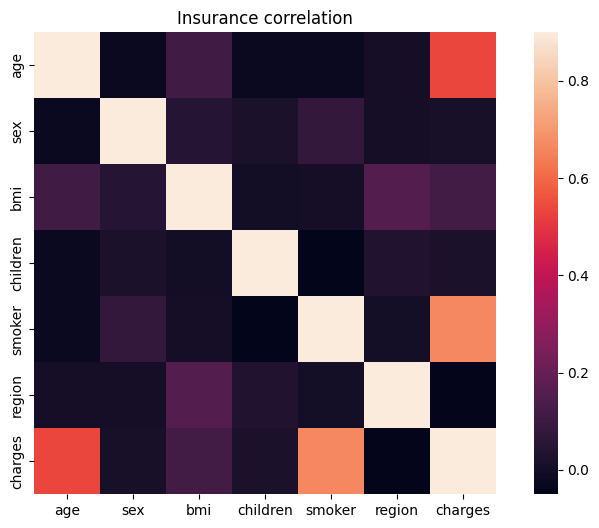

In [ ]:
#heatmap correlation
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), vmax = 0.9, square = True)
plt.title("Insurance correlation")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33, shuffle =True)

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np

rdg = Ridge(alpha = 0.5)
rdg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [ ]:
rdg.score(x_train, y_train)

0.022201316313115838

In [ ]:
yp = rdg.predict(x_test)
print(yp)

[ 1.44632548e-02  1.41567360e-01  1.32118224e-02  2.99634247e-02
  3.50679101e-02  3.42520223e-02  4.37063678e-02 -6.53962020e-03
  3.19499585e-02 -1.27436869e-02  6.05601720e-02  2.80643931e-02
  3.29139810e-02 -1.64627883e-02  5.11436208e-02  5.80788408e-02
  3.57221736e-02  3.52002087e-02  4.11454744e-02  3.17994850e-02
  3.15866370e-02  1.66274755e-02  1.27012484e-02  1.66564553e-02
  1.91015161e-02  2.20539409e-02  4.08144882e-02  3.03626732e-02
  1.73893612e-02  4.03601657e-02  3.37273950e-02 -1.58693801e-02
  2.27407655e-02  1.86655486e-02  1.04450194e-01  2.14177075e-02
  2.83261163e-02  3.12655050e-02  2.41856574e-02  3.03031072e-02
  2.89695434e-02  3.80324250e-02  1.17889214e-02  2.95449106e-02
  1.83667779e-02 -9.85610033e-03  2.76162645e-02 -2.86505892e-03
  2.84468369e-04  2.00128813e-02  5.82975379e-02  9.06803461e-02
  3.08164596e-02  3.66566556e-02  1.51046213e-02  2.96422594e-02
  2.38586806e-02  3.34503592e-02  1.87434692e-02  2.56716683e-02
  3.00567285e-02  3.12035

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


In [ ]:
print(pd.Series(rdg.coef_)) # Print coefficients
print()
print()
print(mean_squared_error(y_test, yp))          # Calculate the test MSE

0   -0.001980
1    0.006709
2   -0.000017
3   -0.101821
4    0.003025
5    0.000123
dtype: float64


0.038724698989921105


In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor()


In [ ]:
# fit the regressor with x and y data
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
ypr = regressor.predict(x_test)

In [ ]:
print(ypr)

[0.   0.   0.05 0.   0.11 0.   0.38 0.   0.04 0.05 0.   0.   0.   0.
 0.39 0.06 0.28 0.07 0.   0.17 0.   0.   0.   0.   0.01 0.   0.17 0.
 0.   0.01 0.   0.   0.   0.01 0.19 0.   0.   0.06 0.   0.   0.01 0.
 0.   0.11 0.01 0.05 0.   0.01 0.01 0.02 0.   0.01 0.   0.03 0.   0.
 0.   0.02 0.   0.   0.08 0.   0.05 0.   0.   0.06 0.   0.03 0.02 0.03
 0.01 0.07 0.   0.   0.   0.   0.   0.   0.01 0.01 0.22 0.   0.   0.15
 0.   0.02 0.   0.33 0.   0.03 0.   0.   0.   0.05 0.   0.   0.02 0.03
 0.02 0.   0.01 0.   0.05 0.   0.   0.   0.   0.01 0.   0.01 0.17 0.
 0.   0.   0.   0.03 0.   0.01 0.02 0.01 0.   0.   0.13 0.02 0.   0.
 0.08 0.   0.03 0.   0.   0.03 0.02 0.   0.   0.   0.02 0.02 0.   0.02
 0.   0.   0.29 0.01 0.   0.   0.01 0.   0.12 0.01 0.   0.   0.   0.04
 0.   0.   0.01 0.05 0.01 0.05 0.01 0.   0.15 0.   0.   0.07 0.01 0.
 0.   0.   0.   0.02 0.02 0.   0.01 0.   0.02 0.08 0.   0.   0.   0.05
 0.   0.   0.   0.   0.   0.02 0.01 0.   0.   0.   0.   0.   0.   0.
 0.   0.04 0.   0.01 0